In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [20]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [21]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
import matplotlib.pyplot as plt


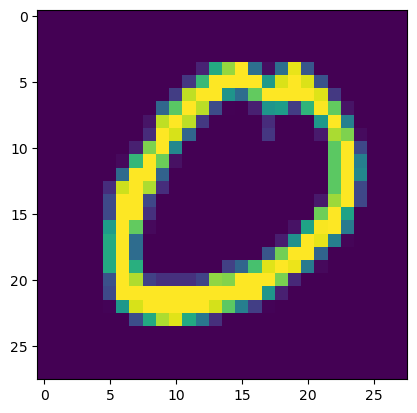

In [23]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [24]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [26]:
X_train.shape

(33600, 784)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier()

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [30]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

10.380237579345703


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9683333333333334

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [35]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [36]:
X_train_trf.shape

(33600, 200)

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.fit(X_train_trf,y_train)


KNeighborsClassifier()

In [39]:
y_pred = knn.predict(X_test_trf)

In [40]:
accuracy_score(y_test,y_pred)

0.9470238095238095

In [41]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))

0.25607142857142856
0.325
0.5129761904761905
0.6713095238095238
0.7360714285714286
0.8278571428571428
0.8457142857142858
0.8725
0.8853571428571428
0.9091666666666667
0.9126190476190477
0.9183333333333333
0.9282142857142858
0.935
0.9365476190476191
0.9364285714285714
0.9396428571428571
0.9401190476190476
0.9432142857142857
0.9460714285714286
0.9444047619047619


KeyboardInterrupt: 

In [42]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [43]:
X_train_trf

array([[-4.65967247, -4.66630006],
       [-4.86433209,  0.31065148],
       [ 4.14030694, -2.64180829],
       ...,
       [-0.38739305, -4.23626989],
       [ 3.17374335, -1.45640323],
       [14.47323858,  9.25902939]])

In [45]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.show()